# 任务一
从波士顿房价数据集中加载数据并且训练模型，用训练过的模型评估预测数据的精度。

## 1、加载数据

In [11]:
import numpy as np
import pandas as pd
from abupy import AbuML
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 数据集
scikit_boston = datasets.load_boston()
x = scikit_boston.data
y = scikit_boston.target
df = pd.DataFrame(
    data=np.c_[x, y], columns=np.append(scikit_boston.feature_names, ["MEDV"])
)
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0063,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


## 2、训练模型

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# 归一-化数据
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
# 模型训练
df = pd.DataFrame(
    data=np.c_[x_train, y_train],
    columns=np.append(scikit_boston.feature_names, ["MEDV"]),
)
boston = AbuML(x_train, y_train, df)
boston.estimator.polynomial_regression(degree=1)
reg = boston.fit()

## 3、预测并评估模型

In [13]:
# 测试集上预测
from sklearn.metrics import r2_score

y_pred = reg.predict(x_test)
score = r2_score(y_test, y_pred)
print("最终结果为:{}".format(score))

最终结果为:0.7333393769589676


# 任务二
利用给出的另一个模拟数据集，实现可视化

## 1、加载数据

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from common import regression

%matplotlib inline
# % matplotlib inline # 在PyCharm、DataSpell等JetBrain软件中运行请注释掉该行

In [15]:
def loadDataSet(fileName):  # general function to parse tab -delimited floats
    numFeat = len(open(fileName).readline().split("\t")) - 1  # get number of fields
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split("\t")
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

## 2、建立模型

In [16]:
# 定义标准线性回归
def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

## 3、查看数据

In [17]:
# 导入需要的实验数据集，并查看前两条数据
xArr, yArr = regression.loadDataSet("./data/ex0.txt")
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [18]:
# ws存放回归系数
ws = regression.standRegres(xArr, yArr)
xMat = np.mat(xArr)
yMat = np.mat(yArr)
yHat = xMat * ws

## 4、显示由数据形成的点阵

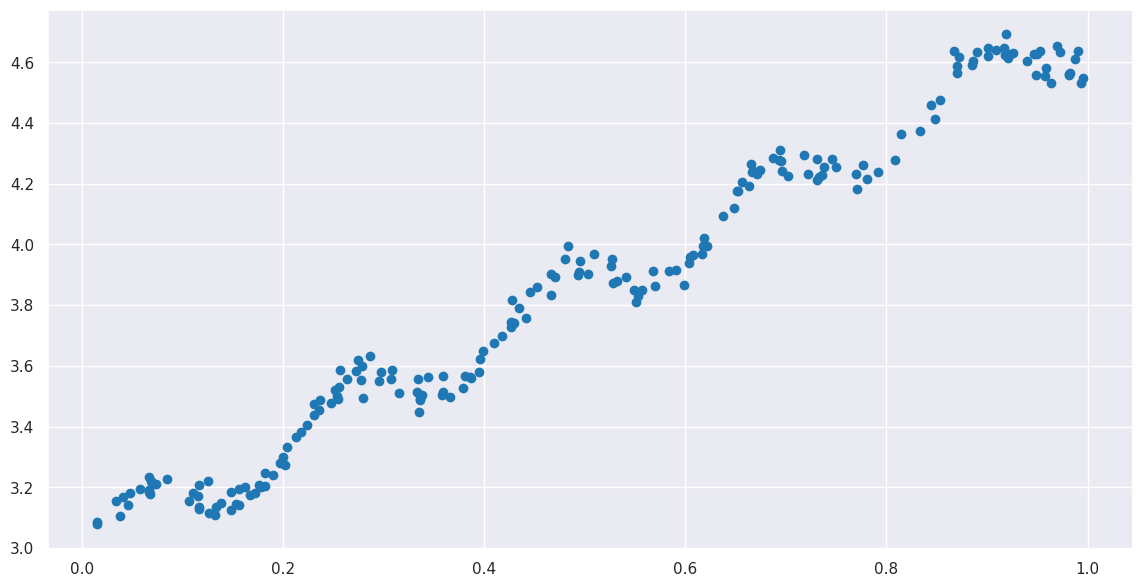

In [19]:
plt.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])

## 5、显示回归线

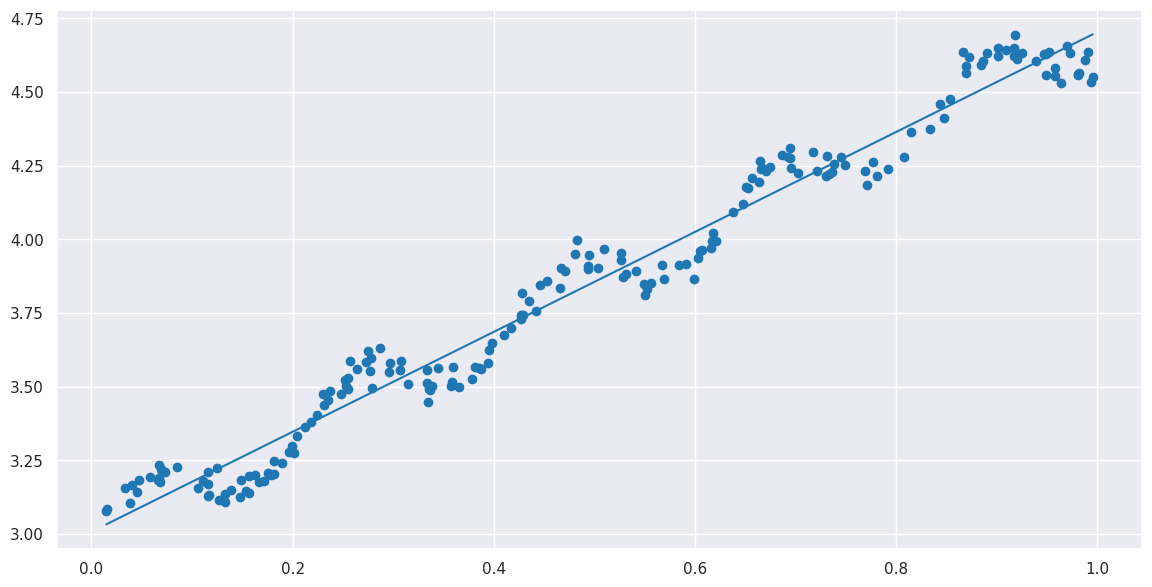

In [20]:
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy * ws
plt.scatter(xMat[:, 1].flatten().A[0], yMat.T[:, 0].flatten().A[0])
plt.plot(xCopy[:, 1], yHat)